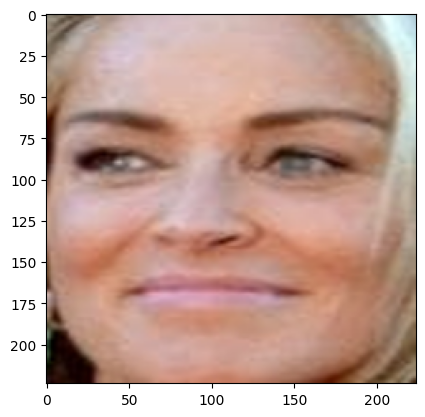

In [1]:
# example of face detection with mtcnn
from matplotlib import pyplot
from PIL import Image

from numpy import asarray
from mtcnn.mtcnn import MTCNN


# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('sharon_stone1.jpg')
# plot the extracted face
pyplot.imshow(pixels)
# show the plot
pyplot.show()

In [6]:
# Ejemplo de predicciones de incrustaciones faciales con ResNet50

from tensorflow.keras.applications import ResNet50
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Cargar modelo ResNet50 preentrenado en ImageNet
model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='avg')

# Función para preprocesar imágenes
def preprocess_image(image_path):
    """Preprocesa una imagen desde una ruta para ajustarse al modelo."""
    image = load_img(image_path, target_size=(224, 224))  # Carga la imagen y cambia el tamaño
    image = img_to_array(image)  # Convierte la imagen a un arreglo numpy
    image = tf.keras.applications.resnet50.preprocess_input(image)  # Preprocesamiento específico
    return np.expand_dims(image, axis=0)  # Agrega una dimensión adicional para batch

# Función para generar predicciones
def predict_embedding(image_path):
    """Genera una predicción de la incrustación facial."""
    preprocessed_image = preprocess_image(image_path)
    return model.predict(preprocessed_image)

# Ejemplo de uso
embedding = predict_embedding('sharon_stone1.jpg')
print(embedding)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
[[1.6371994  0.53909147 0.8539396  ... 0.         0.0361433  0.14879616]]


In [8]:
# Ejemplo de detección e incrustaciones faciales con ResNet50 y MTCNN

from tensorflow.keras.applications import ResNet50
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from mtcnn.mtcnn import MTCNN
from PIL import Image
from numpy import expand_dims, asarray

# Cargar modelo ResNet50 preentrenado en ImageNet
model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='avg')

# Función para preprocesar imágenes
def preprocess_image(image_array):
    """Preprocesa un arreglo de imagen para ajustarse al modelo."""
    image = tf.keras.applications.resnet50.preprocess_input(image_array)  # Preprocesamiento específico
    return np.expand_dims(image, axis=0)  # Agrega una dimensión adicional para batch

# Función para extraer el rostro
def extract_face(filename, required_size=(224, 224)):
    """Extrae un rostro de una fotografía usando MTCNN."""
    # Cargar la imagen desde el archivo
    pixels = pyplot.imread(filename)
    # Crear el detector con pesos predeterminados
    detector = MTCNN()
    # Detectar rostros en la imagen
    results = detector.detect_faces(pixels)
    if not results:
        raise ValueError("No se detectaron rostros en la imagen.")
    # Extraer el cuadro delimitador del primer rostro
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # Asegurar que las coordenadas estén dentro de los límites
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(pixels.shape[1], x2), min(pixels.shape[0], y2)
    # Extraer el rostro
    face = pixels[y1:y2, x1:x2]
    # Redimensionar los píxeles al tamaño requerido
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

# Función para generar predicciones
def predict_embedding(image_path):
    """Genera una predicción de la incrustación facial."""
    # Extraer y preprocesar el rostro
    face_array = extract_face(image_path)
    face_array = face_array.astype('float32')
    preprocessed_image = preprocess_image(face_array)
    # Generar la predicción
    return model.predict(preprocessed_image)

# Ejemplo de uso
embedding = predict_embedding('sharon_stone1.jpg')
print(embedding)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00647456 0.42697132 0.10892045 ... 0.03774558 0.02054228 0.07236069]]
